# Partition Problem

Given a finite set $A$, and a size $s(a)\in\mathbb{Z}^+$ for each $a\in A$, is there a subset $A^{'}\subseteq A$, such that $\Sigma_{a\in A}s(a) = \Sigma_{a\in A-A^{'}}s(a)$.

In [ ]:
!pip install git+https://github.com/maxtuno/peqnp-lib
!pip install matplotlib

In [17]:
import time
import random
import peqnp
import matplotlib.pyplot as plt

The $size$ and $bits$ for the sample set.

In [18]:
bits = 10
size = 100

The data generator and ploter of data

In [19]:
def plot(S, c=None):
    for s in S:
        if c:
            plt.bar(s, s, color=c, alpha=0.7)
        else:
            plt.bar(s, s, color='g', alpha=0.7)
    plt.show()
def gen_data():
    if size % 2 != 0:
        raise Exception('Error: size != 0 mod 2')
    return sorted([random.randint(1, 2 ** bits) for _ in range(size)])

Generate the the sample set.

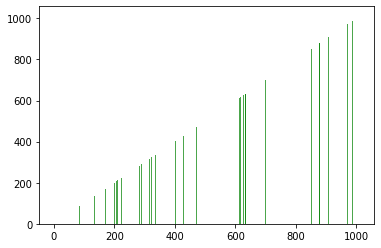

[3, 8, 17, 36, 41, 45, 60, 71, 77, 85, 86, 89, 90, 103, 106, 114, 116, 135, 140, 147, 169, 171, 201, 207, 211, 224, 255, 272, 276, 283, 290, 297, 302, 307, 316, 317, 317, 323, 328, 336, 338, 342, 345, 350, 382, 383, 383, 385, 390, 402, 415, 423, 429, 450, 460, 468, 472, 479, 481, 556, 560, 612, 614, 617, 627, 634, 634, 649, 662, 685, 700, 719, 725, 740, 762, 767, 796, 814, 827, 846, 852, 857, 878, 878, 884, 892, 893, 893, 899, 908, 914, 950, 953, 957, 966, 971, 975, 987, 1005, 1008]


In [20]:
S = gen_data();
plot(S)
print(S)

Solution with **The Core** and **SLIME** SAT Solver.

23907 [17, 36, 41, 85, 90, 106, 116, 135, 140, 147, 169, 171, 224, 255, 272, 276, 297, 302, 317, 317, 342, 345, 350, 383, 385, 390, 402, 429, 468, 472, 479, 481, 556, 560, 612, 617, 634, 634, 662, 685, 719, 762, 796, 814, 827, 857, 878, 950, 953, 957, 987, 1008]
23907 [3, 8, 45, 60, 71, 77, 86, 89, 103, 114, 201, 207, 211, 283, 290, 307, 316, 323, 328, 336, 338, 382, 383, 415, 423, 450, 460, 614, 627, 649, 700, 725, 740, 767, 846, 852, 878, 884, 892, 893, 893, 899, 908, 914, 966, 971, 975, 1005]


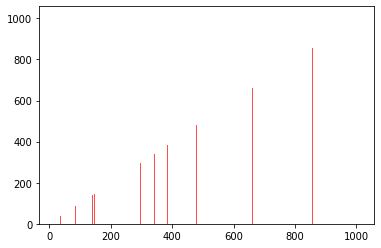

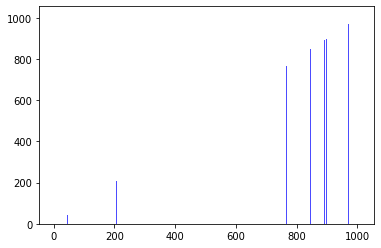

Time 8.124551057815552s


In [21]:
tc = peqnp.TheCore(bits=sum(S).bit_length(), key='partition', folder='db/')

slots = tc.int(size=len(S))

ini = time.time()

assert sum(tc.zero.iff(slots[i], S[i]) for i in range(len(S))) == sum(tc.zero.iff(-slots[i], S[i]) for i in range(len(S)))

if tc.satisfy([slots]):
    A = [S[i] for i in range(len(S)) if slots.binary[i]]
    B = [S[i] for i in range(len(S)) if not slots.binary[i]]
    if sum(A) == sum(B):
        print(sum(A), A)
        print(sum(B), B)
        plot(A, 'r')
        plot(B, 'b')
    else:
        raise Exception
elif tc.unsat:
    print('Infeasible...')
    
end = time.time()
print('Time {}s'.format(end - ini))